In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Loading the dataset
data = pd.read_excel('2015-building-energy-benchmarking.xlsx')

Exploratory Data Analysis (EDA)

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

OSEBuildingID                                                      0
DataYear                                                           0
BuildingType                                                       0
PrimaryPropertyType                                                0
PropertyName                                                       0
TaxParcelIdentificationNumber                                      0
Location                                                           0
CouncilDistrictCode                                                0
Neighborhood                                                       0
YearBuilt                                                          0
NumberofBuildings                                                  0
NumberofFloors                                                     0
PropertyGFATotal                                                   0
PropertyGFAParking                                                 0
PropertyGFABuilding(s)            

In [6]:
# Dropping rows with missing target values (GHGEmissionsIntensity(kgCO2e/ft2))
data_cleaned = data.dropna(subset=['GHGEmissionsIntensity(kgCO2e/ft2)'])


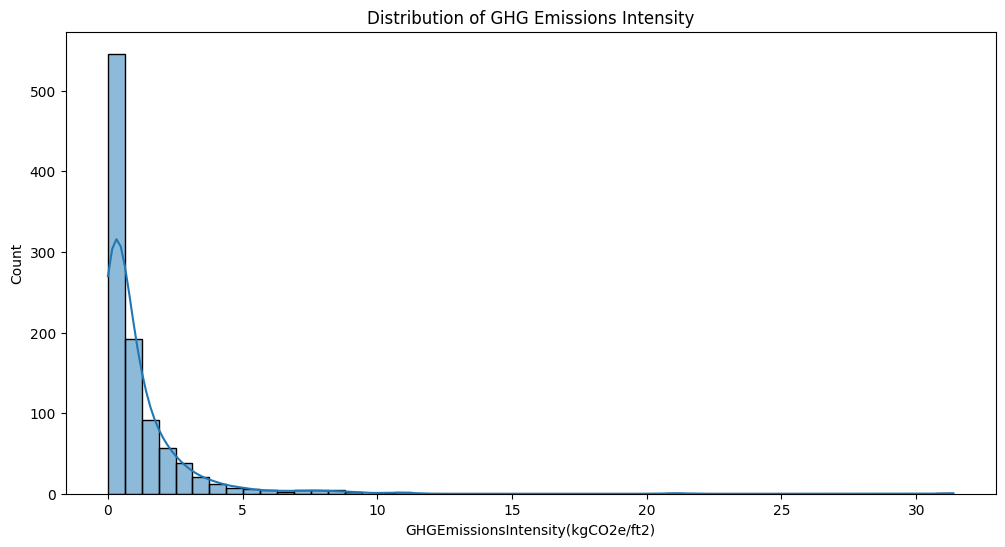

In [7]:
# Distribution plots for key features
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['GHGEmissionsIntensity(kgCO2e/ft2)'], bins=50, kde=True)
plt.title('Distribution of GHG Emissions Intensity')
plt.show()

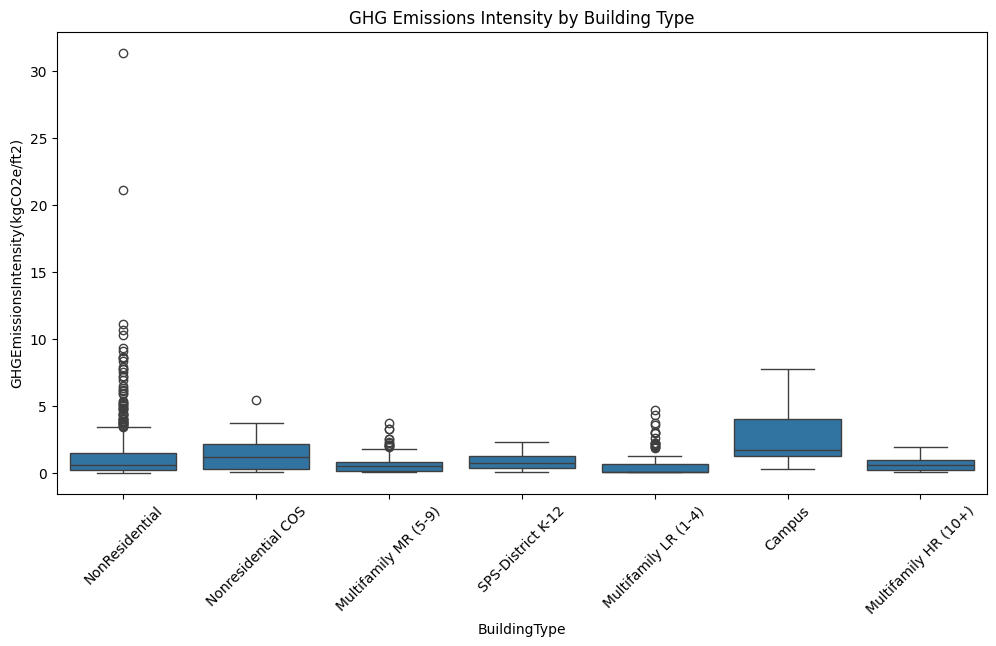

In [9]:
# Box plot for outliers in GHG Emissions Intensity
plt.figure(figsize=(12, 6))
sns.boxplot(x='BuildingType', y='GHGEmissionsIntensity(kgCO2e/ft2)', data=data_cleaned)
plt.title('GHG Emissions Intensity by Building Type')
plt.xticks(rotation=45)
plt.show()

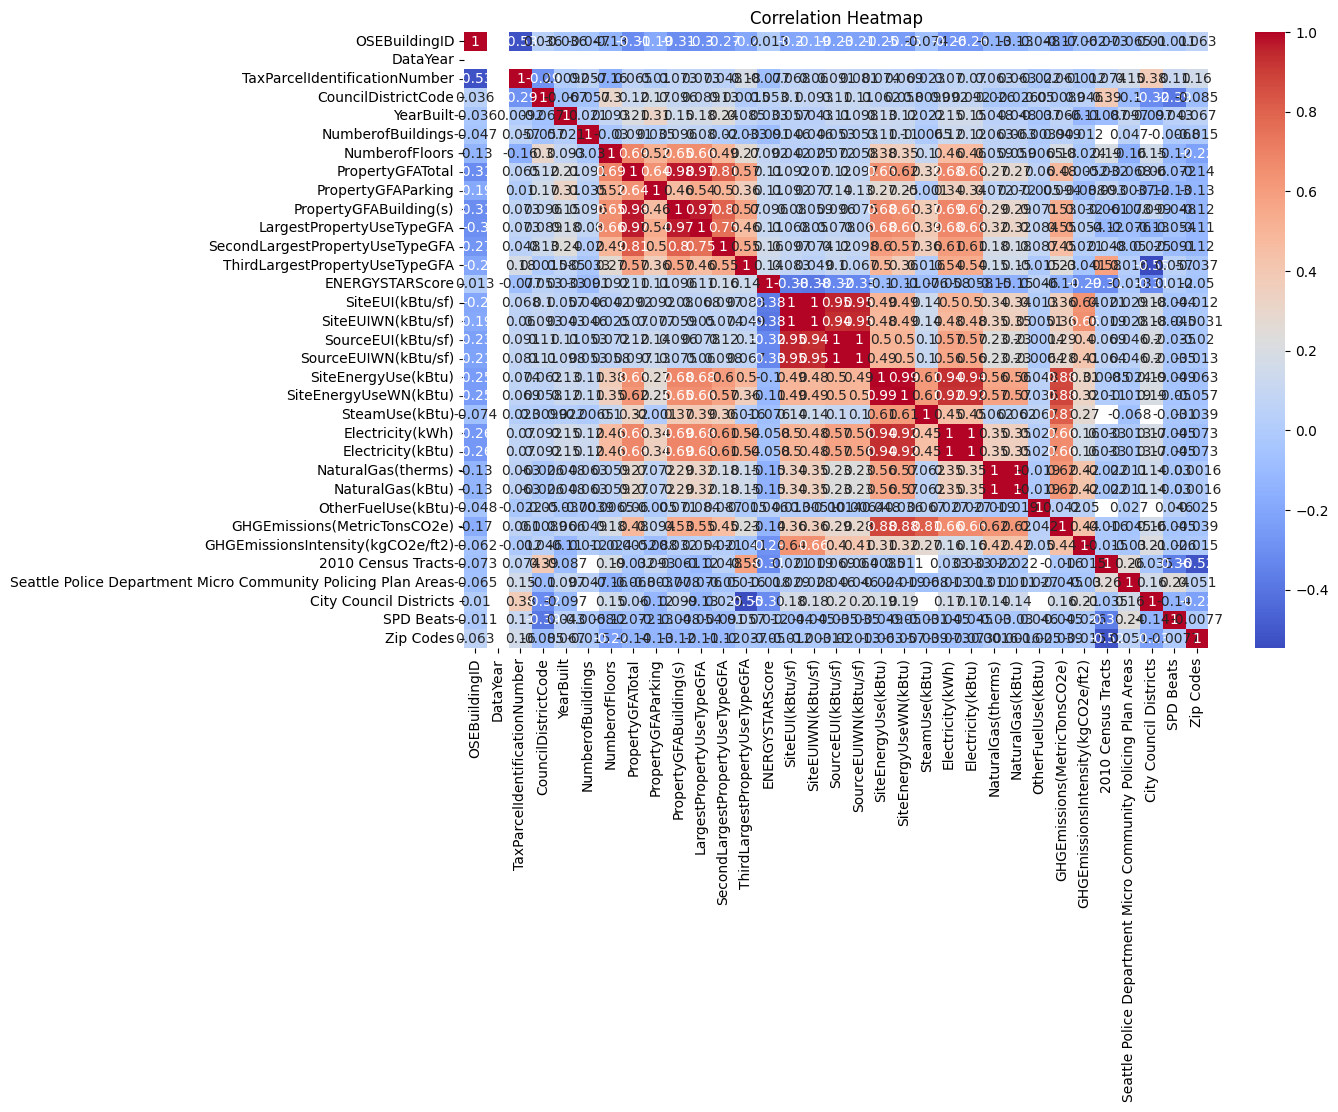

In [11]:
# Heatmap for correlations between variables
plt.figure(figsize=(12, 8))
# Include only numerical features for correlation analysis
corr = data_cleaned.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-13-c562ae00ba51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['BuildingAge'] = 2023 - data_cleaned['YearBuilt']  # Assuming the current year is 2023


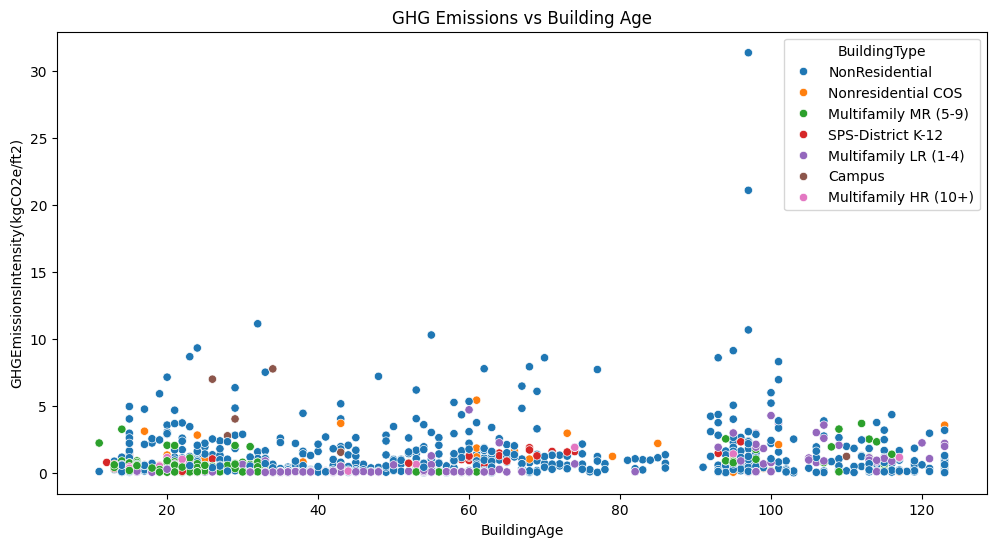

In [13]:
# Scatter plot for Building Age vs GHG Emissions
data_cleaned['BuildingAge'] = 2023 - data_cleaned['YearBuilt']  # Assuming the current year is 2023
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BuildingAge', y='GHGEmissionsIntensity(kgCO2e/ft2)', hue='BuildingType', data=data_cleaned)
plt.title('GHG Emissions vs Building Age')
plt.show()


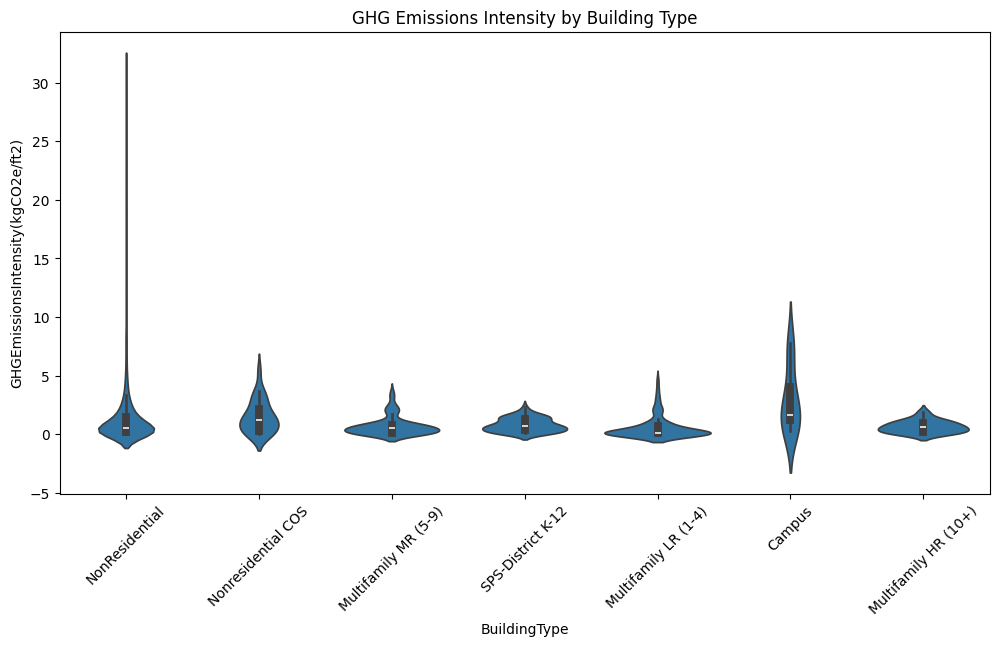

In [15]:
# Violin plot for GHG Emissions across Building Types
plt.figure(figsize=(12, 6))
sns.violinplot(x='BuildingType', y='GHGEmissionsIntensity(kgCO2e/ft2)', data=data_cleaned)
plt.title('GHG Emissions Intensity by Building Type')
plt.xticks(rotation=45)
plt.show()


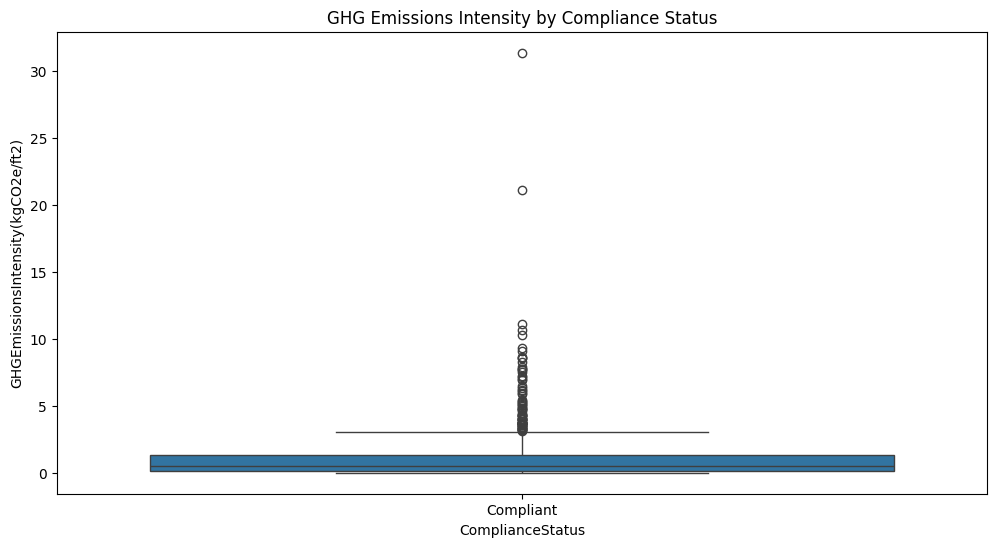

In [17]:
# Box plot for Compliance Status and GHG Emissions Intensity
plt.figure(figsize=(12, 6))
sns.boxplot(x='ComplianceStatus', y='GHGEmissionsIntensity(kgCO2e/ft2)', data=data_cleaned)
plt.title('GHG Emissions Intensity by Compliance Status')
plt.show()

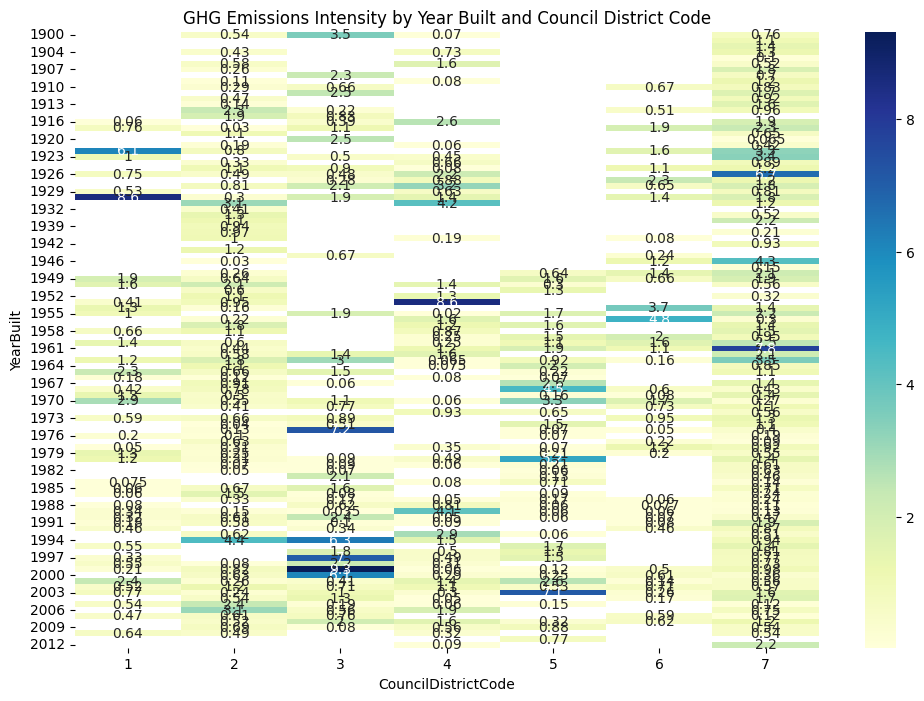

In [19]:
# Heatmap for GHG Emissions Intensity by Year Built and Council District Code
heatmap_data = data_cleaned.pivot_table(values='GHGEmissionsIntensity(kgCO2e/ft2)', index='YearBuilt', columns='CouncilDistrictCode')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('GHG Emissions Intensity by Year Built and Council District Code')
plt.show()

Regression Analysis to predict GHG Emissions Intensity

In [21]:
# Defining the feature matrix X and target variable y
X = data_cleaned[['BuildingAge', 'PropertyGFATotal', 'PropertyGFAParking']]
y = data_cleaned['GHGEmissionsIntensity(kgCO2e/ft2)']

In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predicting the results
y_pred = lr.predict(X_test)

In [25]:
# Evaluating the model
print(f'Linear Regression R^2 Score: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Linear Regression R^2 Score: 0.04674642531057016
Mean Squared Error: 1.7161724951961974


In [26]:
# Predictive Modeling using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Predicting the results
y_pred_rf = rf.predict(X_test)

In [28]:
# Evaluating the Random Forest Model
print(f'Random Forest R^2 Score: {r2_score(y_test, y_pred_rf)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')

Random Forest R^2 Score: -0.7150027213598367
Mean Squared Error: 3.0875735247499994
